<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Mercado-Financeiro/blob/main/Python_para_Finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python para finanças**

## Importação das Bibliotecas

In [73]:
!pip install -q yfinance

In [74]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

## Base de dados com uma ação

In [75]:
gol_df = yf.download("GOLL4.SA", start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [76]:
gol_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...
2023-01-06,7.30,7.65,7.25,7.62,7.62,8020000
2023-01-09,7.43,7.99,7.33,7.93,7.93,7698600
2023-01-10,7.80,8.17,7.79,8.12,8.12,7987400


In [77]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1997 entries, 2015-01-02 to 2023-01-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1997 non-null   float64
 1   High       1997 non-null   float64
 2   Low        1997 non-null   float64
 3   Close      1997 non-null   float64
 4   Adj Close  1997 non-null   float64
 5   Volume     1997 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 109.2 KB


In [78]:
gol_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500


In [79]:
gol_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-06,7.30,7.65,7.25,7.62,7.62,8020000
2023-01-09,7.43,7.99,7.33,7.93,7.93,7698600
2023-01-10,7.80,8.17,7.79,8.12,8.12,7987400
2023-01-11,8.13,8.28,7.93,8.19,8.19,7819800
2023-01-12,8.13,8.35,7.96,8.27,8.27,10125300


In [80]:
gol_df.sample(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-03,2.380000,2.460000,2.310000,2.320000,2.320000,2049700
2015-12-02,3.410000,3.530000,3.360000,3.470000,3.470000,1258500
2016-05-02,2.430000,2.590000,2.350000,2.560000,2.560000,2591400
2021-08-24,18.750000,20.540001,18.750000,20.540001,20.540001,14532500
2022-12-20,6.230000,7.120000,6.190000,6.960000,6.960000,19386800
2018-03-15,20.920000,21.200001,20.469999,21.100000,21.100000,1063900
2017-07-27,8.900000,9.030000,8.560000,8.600000,8.600000,2468200
2020-11-17,20.969999,21.660000,20.520000,21.280001,21.280001,11988200
2017-04-13,9.880000,10.140000,9.630000,9.640000,9.640000,1893200


In [81]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03
mean,15.314682,15.691337,14.916144,15.275894,15.275894,5.637139e+06
std,9.332377,9.503483,9.153048,9.324982,9.324982,5.015011e+06
min,1.160000,1.180000,1.130000,1.160000,1.160000,0.000000e+00
25%,7.900000,8.100000,7.720000,7.900000,7.900000,2.173600e+06
50%,13.900000,14.350000,13.570000,13.890000,13.890000,4.168900e+06
75%,21.049999,21.629999,20.510000,20.920000,20.920000,7.444900e+06
max,43.669998,44.619999,41.310001,43.790001,43.790001,4.368050e+07


In [82]:
#Maior valor de fechamento
gol_df[gol_df['Close'] >= 43.79]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,41.25,44.619999,41.25,43.790001,43.790001,6664200


In [83]:
#menor valor de fechamento
gol_df[(gol_df['Close'] >= 1.15) & ((gol_df['Close'] <= 1.16) )]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-22,1.2,1.26,1.14,1.16,1.16,3830600


In [84]:
gol_df.to_csv('gol.csv')

In [85]:
gol_df_2 = pd.read_csv('/content/gol.csv')

In [86]:
gol_df_2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
1,2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2,2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
3,2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
4,2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...,...
1992,2023-01-06,7.30,7.65,7.25,7.62,7.62,8020000
1993,2023-01-09,7.43,7.99,7.33,7.93,7.93,7698600
1994,2023-01-10,7.80,8.17,7.79,8.12,8.12,7987400
1995,2023-01-11,8.13,8.28,7.93,8.19,8.19,7819800


# Base de Dados com Mais ações

In [87]:
acoes = ['GOLL4.SA','CVCB3.SA','WEGE3.SA','MGLU3.SA','TOTS3.SA', 'BOVA11.SA']

In [88]:
acoes_df = pd.DataFrame()
for acao in acoes:
  print(acao)
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']


GOLL4.SA
[*********************100%***********************]  1 of 1 completed
CVCB3.SA
[*********************100%***********************]  1 of 1 completed
WEGE3.SA
[*********************100%***********************]  1 of 1 completed
MGLU3.SA
[*********************100%***********************]  1 of 1 completed
TOTS3.SA
[*********************100%***********************]  1 of 1 completed
BOVA11.SA
[*********************100%***********************]  1 of 1 completed


In [89]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2023-01-06,7.62,4.62,38.029999,2.760000,27.340000,105.500000
2023-01-09,7.93,4.85,37.919998,2.830000,27.860001,105.349998
2023-01-10,8.12,5.08,37.549999,3.050000,28.830000,107.180000


In [90]:
acoes_df.describe()

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,15.275894,27.935030,17.040306,6.738713,17.932704,81.944157
std,9.324982,16.282216,12.525934,7.622147,9.393112,23.952924
min,1.160000,3.660000,4.942307,0.030585,7.156402,36.450001
25%,7.900000,14.960000,6.750000,0.414062,10.080846,60.130001
50%,13.890000,21.860001,9.385000,3.885625,12.393119,82.720001
75%,20.920000,42.980000,30.450001,10.090000,27.150000,103.099998
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


In [91]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA':'GOL','CVCB3.SA':'CVC','WEGE3.SA':'WEGE',
                                    'MGLU3.SA':"MGLU",'TOTS3.SA':'TOTS', 'BOVA11.SA':'BOVA'})

In [92]:
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


In [93]:
acoes_df.isna().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [94]:
acoes_df.to_csv('acoes.csv')

In [95]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1992,2023-01-06,7.62,4.62,38.029999,2.760000,27.340000,105.500000
1993,2023-01-09,7.93,4.85,37.919998,2.830000,27.860001,105.349998
1994,2023-01-10,8.12,5.08,37.549999,3.050000,28.830000,107.180000
1995,2023-01-11,8.19,5.03,38.599998,3.030000,29.150000,109.099998


In [96]:
acoes_df.columns[1:]

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [97]:
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,15.275894,27.935030,17.040306,6.738713,17.932704,81.944157
std,9.324982,16.282216,12.525934,7.622147,9.393112,23.952924
min,1.160000,3.660000,4.942307,0.030585,7.156402,36.450001
25%,7.900000,14.960000,6.750000,0.414062,10.080846,60.130001
50%,13.890000,21.860001,9.385000,3.885625,12.393119,82.720001
75%,20.920000,42.980000,30.450001,10.090000,27.150000,103.099998
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


# Visualização

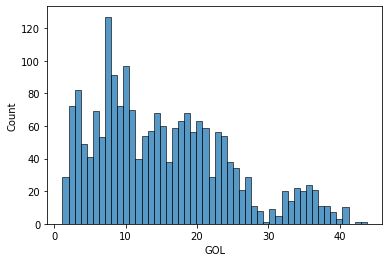

In [101]:
sns.histplot(acoes_df['GOL'], bins=50);

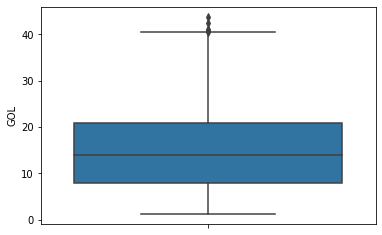

In [109]:
sns.boxplot(y=acoes_df['GOL'],orient="v");

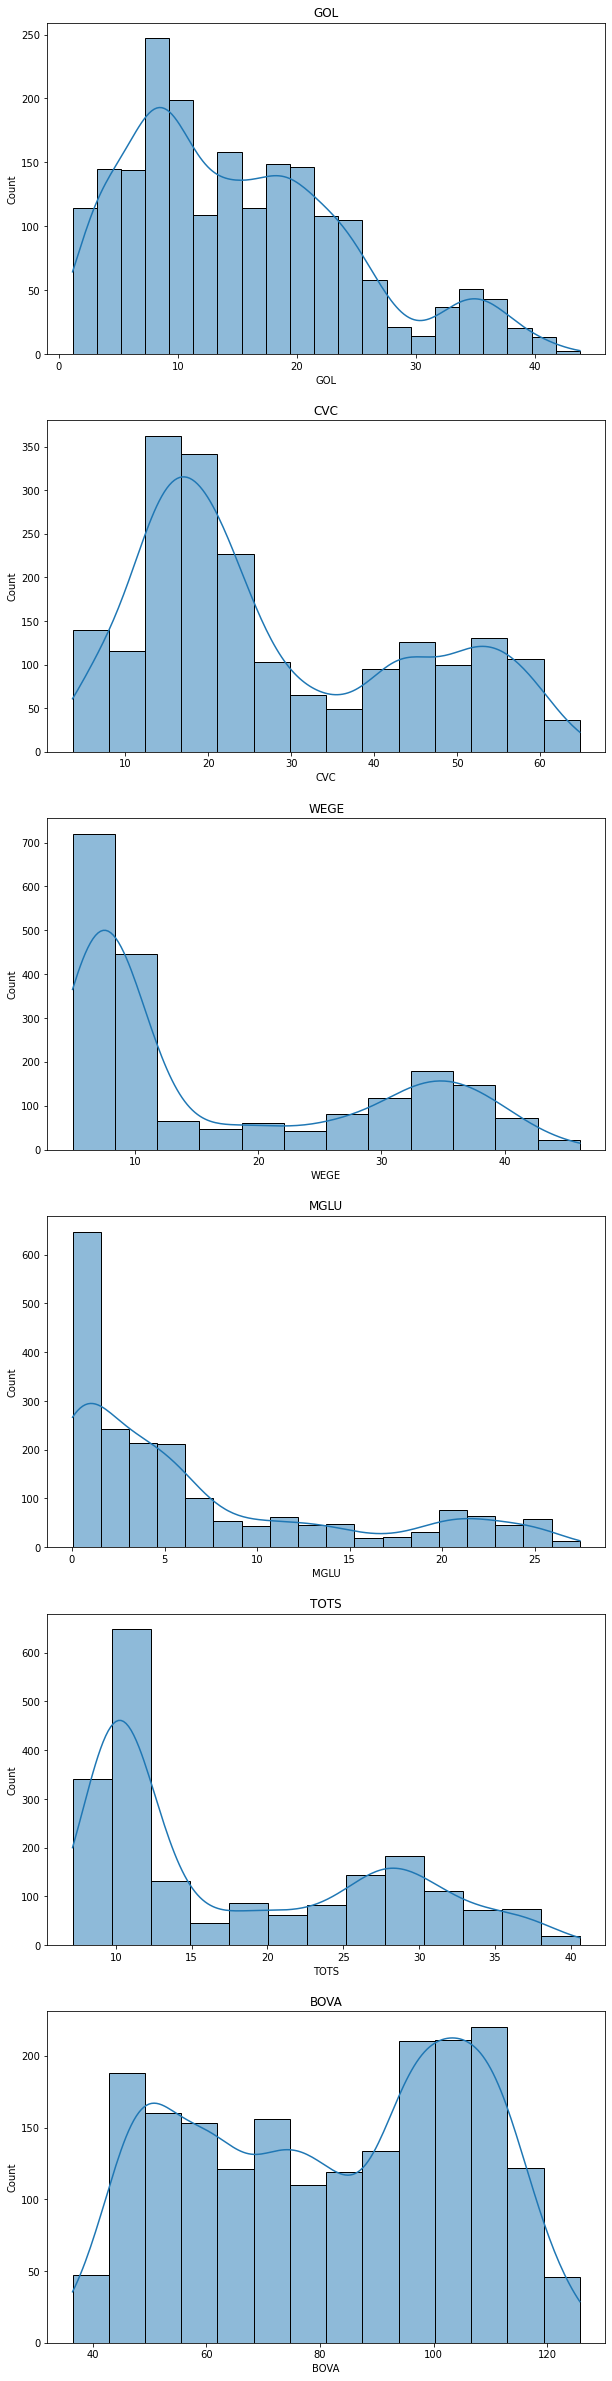

In [126]:
plt.figure(figsize=(10,50))
i=1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i+1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde=True)
  plt.title(acoes_df.columns[i])

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packa

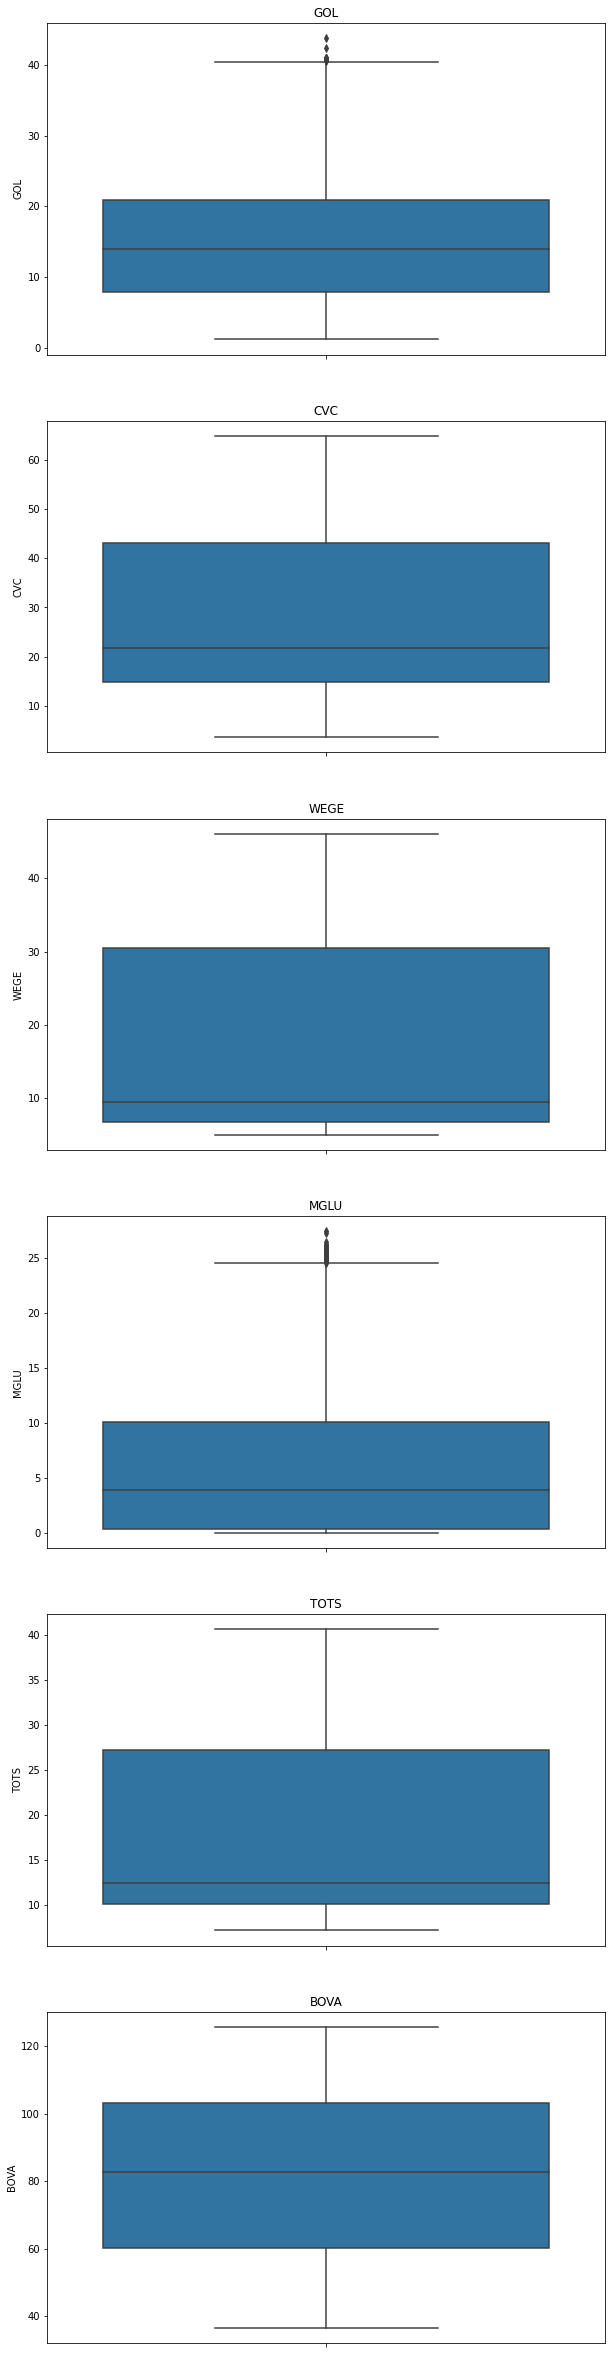

In [125]:
plt.figure(figsize=(10,50))
i=1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i+1)
  sns.boxplot(y= acoes_df[acoes_df.columns[i]], orient='h')
  plt.title(acoes_df.columns[i])